In [1]:
import osmnx as ox
import networkx as nx
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import pandas as pd
import sys
ox.config(use_cache=True, log_console=True)

/Users/ouwaka/opt/anaconda3/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


# 1. Data Pre-processing

## (1) Get the transportation network for East District, Hsinchu City

In [2]:
G = ox. graph_from_place("East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"]', simplify=True)
East = ox. project_graph (G)

## (2) Get the smaller transportation network for East District, Hsinchu City
### In this way, we can specify the nodes that represent each village in East District, Hsinchu City.

In [3]:
A = ox. graph_from_place("East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"~"motorway"]', simplify=True)
East_highway_motorway = ox. project_graph (A)

In [4]:
East_highway_motorway.nodes

NodeView((59841243, 1978206250, 1978206256, 311080350, 313164209, 382954328, 311080356, 311080358, 338641979, 311080367, 1983162853, 313164190, 313164197, 1168830664, 314947099, 314947113, 314947102, 413339632, 338641974, 338641976, 1714279107, 1714279093, 1747621095, 413339633, 1747620923, 1747621005, 4461256994, 4461257003, 1714279046, 1714279039, 1714279047, 1714279049, 1714279052, 1714279051, 1714279058, 1714279067, 1714279084, 1726059979, 1747620937, 1747621080, 1747621036, 314947109, 1978206287, 1978206324, 1726059983, 3340976219, 4461256993))

In [5]:
type(East_highway_motorway.nodes)

networkx.classes.reportviews.NodeView

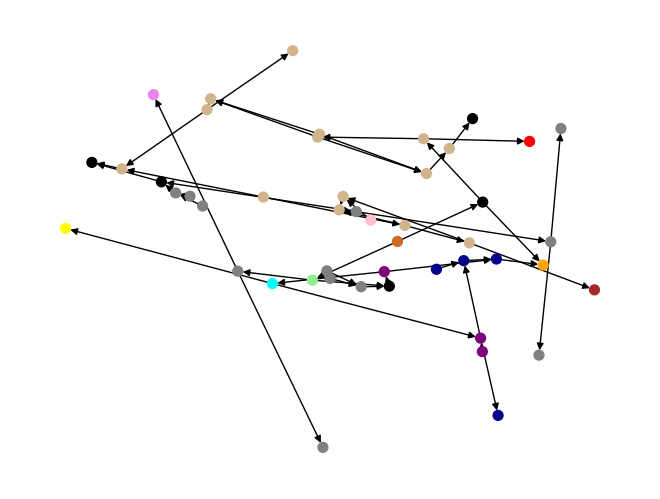

In [6]:
color_map = []
for i in East_highway_motorway.nodes(data=True):
    node=i[0]
    if node==1714279084:
        color_map.append('red')
    elif node==1714279107:
        color_map.append('orange')
    elif node==311080367:
        color_map.append('yellow')
    elif node==4461257003:
        color_map.append('violet')
    elif node==311080358:
        color_map.append('aqua') 
    elif node==338641979:
        color_map.append('darkblue')
    elif node==338641976:
        color_map.append('darkblue')
    elif node==1726059983:
        color_map.append('darkblue')
    elif node==338641974:
        color_map.append('darkblue')
    elif node==1726059979:
        color_map.append('purple')
    elif node==311080356:
        color_map.append('purple')
    elif node==311080358:
        color_map.append('purple')
    elif node==311080367:
        color_map.append('purple')
    elif node==1983162853:
        color_map.append('purple')
    elif node==311080350:
        color_map.append('chocolate')
    elif node==313164209:
        color_map.append('lightgreen')
    elif node==313164197:
        color_map.append('gray')
    elif node==1168830664:
        color_map.append('gray')
    elif node==413339632:
        color_map.append('gray')
    elif node==413339633:
        color_map.append('gray')
    elif node==1747620923:
        color_map.append('gray')
    elif node==1747621005:
        color_map.append('gray')
    elif node==4461256994:
        color_map.append('gray')
    elif node==4461257003:
        color_map.append('gray')
    elif node==1747620937:
        color_map.append('gray')
    elif node==1747621080:
        color_map.append('gray')
    elif node==1747620937:
        color_map.append('gray')
    elif node==1747621036:
        color_map.append('gray')
    elif node==3340976219:
        color_map.append('gray')
    elif node==4461256993:
        color_map.append('gray')
    elif node==314947099:
        color_map.append('pink')
    elif node==1978206324:
        color_map.append('brown')
    elif node==413339632:
        color_map.append('tan')
    elif node==59841243:
        color_map.append('tan')
    elif node==1978206250:
        color_map.append('tan')
    elif node==1978206256:
        color_map.append('tan')
    elif node==314947099:
        color_map.append('tan')
    elif node==314947113:
        color_map.append('tan')
    elif node==314947102:
        color_map.append('tan')
    elif node==1714279093:
        color_map.append('tan')
    elif node==1714279046:
        color_map.append('tan')
    elif node==1714279047:
        color_map.append('tan')
    elif node==1714279049:
        color_map.append('tan')
    elif node==1714279052:
        color_map.append('tan')
    elif node==1714279051:
        color_map.append('tan')
    elif node==1714279058:
        color_map.append('tan')
    elif node==1714279067:
        color_map.append('tan')
    elif node==1978206287:
        color_map.append('tan')
    elif node==1978206324:
        color_map.append('tan')
    else:
        color_map.append('k')
#print(len(color_map))
#print(East_highway_motorway.number_of_nodes())
nx.draw(East_highway_motorway, nodelist=East_highway_motorway.nodes, node_size=50, node_color=color_map)

In [7]:
import networkx as nx

edges = ([(0, 1, 0.5697), (0, 2, 0.585), (1, 42, 0.239), (1, 16, 0.1991), 
  (2, 41, 1.1586), (3, 4, 0.227), (3, 5, 0.7563), (4, 11, 0.3607), 
  (4, 13, 0.1417), (5, 21, 0.7231), (5, 20, 0.5836), (6, 7, 0.1823), 
  (6, 8, 0.3868), (7, 9, 0.1079), (7, 10, 0.0628), (8, 20, 0.2426), 
  (10, 44, 0.0062), (10, 19, 0.0607), (11, 6, 0.1298), (12, 11, 0.0809), 
  (13, 26, 0.0858), (13, 27, 0.1832), (14, 15, 0.0433), (15, 16, 0.0919), 
  (16, 17, 0.4267), (17, 22, 0.3714), (17, 23, 0.0943), (18, 19, 0.0505), 
  (19, 8, 0.0951), (21, 36, 0.0531), (21, 33, 0.204), (22, 41, 0.1865), 
  (23, 24, 0.1878), (23, 25, 0.0837), (28, 29, 0.0692), (30, 28, 0.0818), 
  (31, 30, 0.0699), (31, 32, 0.005), (32, 34, 0.0926), (33, 32, 0.07), 
  (33, 30, 0.0048), (34, 35, 0.0734), (34, 2, 0.386), (37, 10, 0.0048), 
  (38, 39, 0.1618), (39, 22, 0.1358), (40, 12, 0.1316), (42, 15, 0.0101), 
  (42, 43, 0.0994), (45, 12, 0.1184), (46, 39, 0.1256)])

# create an empty graph
G = nx.Graph()

# add edges to the graph with their respective weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# get the adjacency matrix
adj_matrix = nx.to_numpy_matrix(G)

print(adj_matrix)

[[0.     0.5697 0.585  ... 0.     0.     0.    ]
 [0.5697 0.     0.     ... 0.     0.     0.    ]
 [0.585  0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


In [8]:
adj_matrix=[[0.,0.5697,0.585,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.5697,0.,0.,0.239,0.1991,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.585,0.,0.,0.,0.,1.1586,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.386,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.239,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.0101,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.0994,0.,0.]
,[0.,0.1991,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.0919,0.4267,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,1.1586,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.1865,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.227,0.7563,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.227,0.,0.,0.3607
,0.1417,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.7563,0.,0.,0.
,0.,0.7231,0.5836,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.3607,0.,0.
,0.,0.,0.,0.1298,0.,0.,0.,0.,0.,0.
,0.0809,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.1417,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.0858,0.1832,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.7231,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.0531
,0.204,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.5836,0.
,0.,0.,0.,0.,0.,0.2426,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.1298
,0.,0.,0.,0.,0.1823,0.3868,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.1823,0.,0.,0.1079,0.0628,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.2426,0.3868,0.,0.,0.,0.,0.,0.0951
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.1079,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.0628,0.,0.,0.,0.0062,0.0607
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.0048,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.0062,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.0951,0.,0.0607,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.0505,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.0809
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.1316,0.,0.1184,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.0858,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.1832,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.0433,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.0101,0.0919,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.0433,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.4267,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.3714,0.0943,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.1865,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.3714,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.1358,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.0943,0.,0.,0.,0.
,0.,0.1878,0.0837,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.0505
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.0531,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.204,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.0048,0.,0.07,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.1878,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.0837,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.0692,0.0818,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.0692,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.0048,0.,0.,0.0818,0.,0.,0.0699,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.0699,0.,0.005,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.07,0.,0.,0.,0.,0.,0.005,0.,0.0926,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.386,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.0926,0.,0.0734
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.0734,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.0048,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.1618,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.1358,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.1618,0.,0.,0.,0.,0.1256]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.1316,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.0994,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.1184,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.]
,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.1256,0.,0.,0.,0.]]

In [9]:
import networkx as nx

# Create an empty graph
G = nx.Graph()


G.add_weighted_edges_from(edges)

# Compute the distance matrix
dist_matrix = nx.floyd_warshall_numpy(G)

print(dist_matrix)

[[0.     0.5697 0.585  ... 0.9081 3.6028 1.8283]
 [0.5697 0.     1.1547 ... 0.3384 4.1725 1.2586]
 [0.585  1.1547 0.     ... 1.4931 3.0178 1.6065]
 ...
 [0.9081 0.3384 1.4931 ... 0.     4.5109 1.2609]
 [3.6028 4.1725 3.0178 ... 4.5109 0.     4.6243]
 [1.8283 1.2586 1.6065 ... 1.2609 4.6243 0.    ]]


In [10]:
dist_matrix=[[0.,0.5697,0.585,0.8087,0.7688,1.7436,2.817,3.044,2.0607,3.4035
,3.1857,1.3376,2.6443,3.2737,3.1055,2.8869,3.2134,3.0427,3.0489,2.982
,3.4844,3.2715,3.3689,0.8621,0.8188,1.1955,1.5669,1.2898,3.0325,1.3907
,1.1336,1.4776,1.3735,1.2202,1.2894,1.1384,1.0686,1.0636,0.971,1.0444
,3.0475,1.8645,1.7027,3.616,0.9081,3.6028,1.8283]
,[0.5697,0.,1.1547,0.239,0.1991,1.1837,3.3867,3.6137,2.6304,3.9732
,3.7554,1.9073,3.214,3.8434,3.6752,3.4566,3.7831,3.6124,3.6186,3.5517
,4.0541,3.8412,3.9386,0.2924,0.2491,0.6258,0.9972,0.7201,3.6022,1.9604
,1.7033,0.9079,0.8038,1.7899,1.8591,1.7081,1.6383,1.6333,1.5407,1.6141
,3.6172,1.2948,1.133,4.1857,0.3384,4.1725,1.2586]
,[0.585,1.1547,0.,1.3937,1.3538,1.1586,2.232,2.459,1.4757,2.8185
,2.6007,0.7526,2.0593,2.6887,2.5205,2.3019,2.6284,2.4577,2.4639,2.397
,2.8994,2.6865,2.7839,1.4471,1.4038,1.7165,1.3451,1.8108,2.4475,0.8057
,0.5486,1.9986,1.8945,0.6352,0.7044,0.5534,0.4836,0.4786,0.386,0.4594
,2.4625,1.6427,1.4809,3.031,1.4931,3.0178,1.6065]
,[0.8087,0.239,1.3937,0.,0.102,1.0866,3.6257,3.8527,2.8694,4.2122
,3.9944,2.1463,3.453,4.0824,3.9142,3.6956,4.0221,3.8514,3.8576,3.7907
,4.2931,4.0802,4.1776,0.0534,0.0101,0.5287,0.9001,0.623,3.8412,2.1994
,1.9423,0.8108,0.7067,2.0289,2.0981,1.9471,1.8773,1.8723,1.7797,1.8531
,3.8562,1.1977,1.0359,4.4247,0.0994,4.4115,1.1615]
,[0.7688,0.1991,1.3538,0.102,0.,0.9846,3.5858,3.8128,2.8295,4.1723
,3.9545,2.1064,3.4131,4.0425,3.8743,3.6557,3.9822,3.8115,3.8177,3.7508
,4.2532,4.0403,4.1377,0.1352,0.0919,0.4267,0.7981,0.521,3.8013,2.1595
,1.9024,0.7088,0.6047,1.989,2.0582,1.9072,1.8374,1.8324,1.7398,1.8132
,3.8163,1.0957,0.9339,4.3848,0.2014,4.3716,1.0595]
,[1.7436,1.1837,1.1586,1.0866,0.9846,0.,3.3906,3.6176,2.6343,3.9771
,3.7593,1.9112,3.2179,3.8473,3.6791,3.4605,3.787,3.6163,3.6225,3.5556
,4.058,3.8451,3.9425,1.1198,1.0765,0.5579,0.1865,0.6522,3.6061,1.9643
,1.7072,0.84,0.7359,1.7938,1.863,1.712,1.6422,1.6372,1.5446,1.618
,3.6211,0.4841,0.3223,4.1896,1.186,4.1764,0.4479]
,[2.817,3.3867,2.232,3.6257,3.5858,3.3906,0.,0.227,0.7563,0.5877
,0.3687,1.4794,1.3399,0.7175,0.8998,1.1043,1.0077,0.9626,0.9688,1.0233
,0.6686,0.4545,0.5519,3.6791,3.6358,3.9485,3.5771,4.0428,1.0738,1.5325
,1.6834,4.2306,4.1265,1.77,1.8392,1.6882,1.7581,1.7534,1.846,1.9194
,0.9674,3.8747,3.7129,0.8002,3.7251,0.787,3.8385]
,[3.044,3.6137,2.459,3.8527,3.8128,3.6176,0.227,0.,0.9833,0.3607
,0.1417,1.7064,1.1199,0.4905,0.6728,0.8773,0.7807,0.7356,0.7418,0.7963
,0.4416,0.2275,0.3249,3.9061,3.8628,4.1755,3.8041,4.2698,0.8468,1.7595
,1.9104,4.4576,4.3535,1.997,2.0662,1.9152,1.9851,1.9804,2.073,2.1464
,0.7404,4.1017,3.9399,0.5732,3.9521,0.56,4.0655]
,[2.0607,2.6304,1.4757,2.8694,2.8295,2.6343,0.7563,0.9833,0.,1.3428
,1.125,0.7231,0.5836,1.213,1.0448,0.8262,1.1527,0.982,0.9882,0.9213
,1.4237,1.2108,1.3082,2.9228,2.8795,3.1922,2.8208,3.2865,0.9718,0.7762
,0.9271,3.4743,3.3702,1.0137,1.0829,0.9319,1.0018,0.9971,1.0897,1.1631
,0.9868,3.1184,2.9566,1.5553,2.9688,1.5421,3.0822]
,[3.4035,3.9732,2.8185,4.2122,4.1723,3.9771,0.5877,0.3607,1.3428,0.
,0.5024,2.0659,0.7592,0.1298,0.3121,0.5166,0.42,0.3749,0.3811,0.4356
,0.0809,0.5882,0.6856,4.2656,4.2223,4.535,4.1636,4.6293,0.4861,2.119
,2.2699,4.8171,4.713,2.3565,2.4257,2.2747,2.3446,2.3399,2.4325,2.5059
,0.3797,4.4612,4.2994,0.2125,4.3116,0.1993,4.425,]
,[3.1857,3.7554,2.6007,3.9944,3.9545,3.7593,0.3687,0.1417,1.125,0.5024
,0.,1.8481,1.2616,0.6322,0.8145,1.019,0.9224,0.8773,0.8835,0.938
,0.5833,0.0858,0.1832,4.0478,4.0045,4.3172,3.9458,4.4115,0.9885,1.9012
,2.0521,4.5993,4.4952,2.1387,2.2079,2.0569,2.1268,2.1221,2.2147,2.2881
,0.8821,4.2434,4.0816,0.7149,4.0938,0.7017,4.2072]
,[1.3376,1.9073,0.7526,2.1463,2.1064,1.9112,1.4794,1.7064,0.7231,2.0659
,1.8481,0.,1.3067,1.9361,1.7679,1.5493,1.8758,1.7051,1.7113,1.6444
,2.1468,1.9339,2.0313,2.1997,2.1564,2.4691,2.0977,2.5634,1.6949,0.0531
,0.204,2.7512,2.6471,0.2906,0.3598,0.2088,0.2787,0.274,0.3666,0.44
,1.7099,2.3953,2.2335,2.2784,2.2457,2.2652,2.3591]
,[2.6443,3.214,2.0593,3.453,3.4131,3.2179,1.3399,1.1199,0.5836,0.7592
,1.2616,1.3067,0.,0.6294,0.4612,0.2426,0.5691,0.3984,0.4046,0.3377
,0.8401,1.3474,1.4448,3.5064,3.4631,3.7758,3.4044,3.8701,0.3882,1.3598
,1.5107,4.0579,3.9538,1.5973,1.6665,1.5155,1.5854,1.5807,1.6733,1.7467
,0.4032,3.702,3.5402,0.9717,3.5524,0.9585,3.6658]
,[3.2737,3.8434,2.6887,4.0824,4.0425,3.8473,0.7175,0.4905,1.213,0.1298
,0.6322,1.9361,0.6294,0.,0.1823,0.3868,0.2902,0.2451,0.2513,0.3058
,0.2107,0.718,0.8154,4.1358,4.0925,4.4052,4.0338,4.4995,0.3563,1.9892
,2.1401,4.6873,4.5832,2.2267,2.2959,2.1449,2.2148,2.2101,2.3027,2.3761
,0.2499,4.3314,4.1696,0.3423,4.1818,0.3291,4.2952]
,[3.1055,3.6752,2.5205,3.9142,3.8743,3.6791,0.8998,0.6728,1.0448,0.3121
,0.8145,1.7679,0.4612,0.1823,0.,0.2186,0.1079,0.0628,0.069,0.1235
,0.393,0.9003,0.9977,3.9676,3.9243,4.237,3.8656,4.3313,0.174,1.821
,1.9719,4.5191,4.415,2.0585,2.1277,1.9767,2.0466,2.0419,2.1345,2.2079
,0.0676,4.1632,4.0014,0.5246,4.0136,0.5114,4.127,]
,[2.8869,3.4566,2.3019,3.6956,3.6557,3.4605,1.1043,0.8773,0.8262,0.5166
,1.019,1.5493,0.2426,0.3868,0.2186,0.,0.3265,0.1558,0.162,0.0951
,0.5975,1.1048,1.2022,3.749,3.7057,4.0184,3.647,4.1127,0.1456,1.6024
,1.7533,4.3005,4.1964,1.8399,1.9091,1.7581,1.828,1.8233,1.9159,1.9893
,0.1606,3.9446,3.7828,0.7291,3.795,0.7159,3.9084]
,[3.2134,3.7831,2.6284,4.0221,3.9822,3.787,1.0077,0.7807,1.1527,0.42
,0.9224,1.8758,0.5691,0.2902,0.1079,0.3265,0.,0.1707,0.1769,0.2314
,0.5009,1.0082,1.1056,4.0755,4.0322,4.3449,3.9735,4.4392,0.2819,1.9289
,2.0798,4.627,4.5229,2.1664,2.2356,2.0846,2.1545,2.1498,2.2424,2.3158
,0.1755,4.2711,4.1093,0.6325,4.1215,0.6193,4.2349]
,[3.0427,3.6124,2.4577,3.8514,3.8115,3.6163,0.9626,0.7356,0.982,0.3749
,0.8773,1.7051,0.3984,0.2451,0.0628,0.1558,0.1707,0.,0.0062,0.0607
,0.4558,0.9631,1.0605,3.9048,3.8615,4.1742,3.8028,4.2685,0.1112,1.7582
,1.9091,4.4563,4.3522,1.9957,2.0649,1.9139,1.9838,1.9791,2.0717,2.1451
,0.0048,4.1004,3.9386,0.5874,3.9508,0.5742,4.0642]
,[3.0489,3.6186,2.4639,3.8576,3.8177,3.6225,0.9688,0.7418,0.9882,0.3811
,0.8835,1.7113,0.4046,0.2513,0.069,0.162,0.1769,0.0062,0.,0.0669
,0.462,0.9693,1.0667,3.911,3.8677,4.1804,3.809,4.2747,0.1174,1.7644
,1.9153,4.4625,4.3584,2.0019,2.0711,1.9201,1.99,1.9853,2.0779,2.1513
,0.011,4.1066,3.9448,0.5936,3.957,0.5804,4.0704]
,[2.982,3.5517,2.397,3.7907,3.7508,3.5556,1.0233,0.7963,0.9213,0.4356
,0.938,1.6444,0.3377,0.3058,0.1235,0.0951,0.2314,0.0607,0.0669,0.
,0.5165,1.0238,1.1212,3.8441,3.8008,4.1135,3.7421,4.2078,0.0505,1.6975
,1.8484,4.3956,4.2915,1.935,2.0042,1.8532,1.9231,1.9184,2.011,2.0844
,0.0655,4.0397,3.8779,0.6481,3.8901,0.6349,4.0035]
,[3.4844,4.0541,2.8994,4.2931,4.2532,4.058,0.6686,0.4416,1.4237,0.0809
,0.5833,2.1468,0.8401,0.2107,0.393,0.5975,0.5009,0.4558,0.462,0.5165
,0.,0.6691,0.7665,4.3465,4.3032,4.6159,4.2445,4.7102,0.567,2.1999
,2.3508,4.898,4.7939,2.4374,2.5066,2.3556,2.4255,2.4208,2.5134,2.5868
,0.4606,4.5421,4.3803,0.1316,4.3925,0.1184,4.5059]
,[3.2715,3.8412,2.6865,4.0802,4.0403,3.8451,0.4545,0.2275,1.2108,0.5882
,0.0858,1.9339,1.3474,0.718,0.9003,1.1048,1.0082,0.9631,0.9693,1.0238
,0.6691,0.,0.269,4.1336,4.0903,4.403,4.0316,4.4973,1.0743,1.987
,2.1379,4.6851,4.581,2.2245,2.2937,2.1427,2.2126,2.2079,2.3005,2.3739
,0.9679,4.3292,4.1674,0.8007,4.1796,0.7875,4.293,]
,[3.3689,3.9386,2.7839,4.1776,4.1377,3.9425,0.5519,0.3249,1.3082,0.6856
,0.1832,2.0313,1.4448,0.8154,0.9977,1.2022,1.1056,1.0605,1.0667,1.1212
,0.7665,0.269,0.,4.231,4.1877,4.5004,4.129,4.5947,1.1717,2.0844
,2.2353,4.7825,4.6784,2.3219,2.3911,2.2401,2.31,2.3053,2.3979,2.4713
,1.0653,4.4266,4.2648,0.8981,4.277,0.8849,4.3904]
,[0.8621,0.2924,1.4471,0.0534,0.1352,1.1198,3.6791,3.9061,2.9228,4.2656
,4.0478,2.1997,3.5064,4.1358,3.9676,3.749,4.0755,3.9048,3.911,3.8441
,4.3465,4.1336,4.231,0.,0.0433,0.5619,0.9333,0.6562,3.8946,2.2528
,1.9957,0.844,0.7399,2.0823,2.1515,2.0005,1.9307,1.9257,1.8331,1.9065
,3.9096,1.2309,1.0691,4.4781,0.1528,4.4649,1.1947]
,[0.8188,0.2491,1.4038,0.0101,0.0919,1.0765,3.6358,3.8628,2.8795,4.2223
,4.0045,2.1564,3.4631,4.0925,3.9243,3.7057,4.0322,3.8615,3.8677,3.8008
,4.3032,4.0903,4.1877,0.0433,0.,0.5186,0.89,0.6129,3.8513,2.2095
,1.9524,0.8007,0.6966,2.039,2.1082,1.9572,1.8874,1.8824,1.7898,1.8632
,3.8663,1.1876,1.0258,4.4348,0.1095,4.4216,1.1514]
,[1.1955,0.6258,1.7165,0.5287,0.4267,0.5579,3.9485,4.1755,3.1922,4.535
,4.3172,2.4691,3.7758,4.4052,4.237,4.0184,4.3449,4.1742,4.1804,4.1135
,4.6159,4.403,4.5004,0.5619,0.5186,0.,0.3714,0.0943,4.164,2.5222
,2.2651,0.2821,0.178,2.3517,2.4209,2.2699,2.2001,2.1951,2.1025,2.1759
,4.179,0.669,0.5072,4.7475,0.6281,4.7343,0.6328]
,[1.5669,0.9972,1.3451,0.9001,0.7981,0.1865,3.5771,3.8041,2.8208,4.1636
,3.9458,2.0977,3.4044,4.0338,3.8656,3.647,3.9735,3.8028,3.809,3.7421
,4.2445,4.0316,4.129,0.9333,0.89,0.3714,0.,0.4657,3.7926,2.1508
,1.8937,0.6535,0.5494,1.9803,2.0495,1.8985,1.8287,1.8237,1.7311,1.8045
,3.8076,0.2976,0.1358,4.3761,0.9995,4.3629,0.2614]
,[1.2898,0.7201,1.8108,0.623,0.521,0.6522,4.0428,4.2698,3.2865,4.6293
,4.4115,2.5634,3.8701,4.4995,4.3313,4.1127,4.4392,4.2685,4.2747,4.2078
,4.7102,4.4973,4.5947,0.6562,0.6129,0.0943,0.4657,0.,4.2583,2.6165
,2.3594,0.1878,0.0837,2.446,2.5152,2.3642,2.2944,2.2894,2.1968,2.2702
,4.2733,0.7633,0.6015,4.8418,0.7224,4.8286,0.7271]
,[3.0325,3.6022,2.4475,3.8412,3.8013,3.6061,1.0738,0.8468,0.9718,0.4861
,0.9885,1.6949,0.3882,0.3563,0.174,0.1456,0.2819,0.1112,0.1174,0.0505
,0.567,1.0743,1.1717,3.8946,3.8513,4.164,3.7926,4.2583,0.,1.748
,1.8989,4.4461,4.342,1.9855,2.0547,1.9037,1.9736,1.9689,2.0615,2.1349
,0.116,4.0902,3.9284,0.6986,3.9406,0.6854,4.054,]
,[1.3907,1.9604,0.8057,2.1994,2.1595,1.9643,1.5325,1.7595,0.7762,2.119
,1.9012,0.0531,1.3598,1.9892,1.821,1.6024,1.9289,1.7582,1.7644,1.6975
,2.1999,1.987,2.0844,2.2528,2.2095,2.5222,2.1508,2.6165,1.748,0.
,0.2571,2.8043,2.7002,0.3437,0.4129,0.2619,0.3318,0.3271,0.4197,0.4931
,1.763,2.4484,2.2866,2.3315,2.2988,2.3183,2.4122]
,[1.1336,1.7033,0.5486,1.9423,1.9024,1.7072,1.6834,1.9104,0.9271,2.2699
,2.0521,0.204,1.5107,2.1401,1.9719,1.7533,2.0798,1.9091,1.9153,1.8484
,2.3508,2.1379,2.2353,1.9957,1.9524,2.2651,1.8937,2.3594,1.8989,0.2571
,0.,2.5472,2.4431,0.0866,0.1558,0.0048,0.0747,0.07,0.1626,0.236
,1.9139,2.1913,2.0295,2.4824,2.0417,2.4692,2.1551]
,[1.4776,0.9079,1.9986,0.8108,0.7088,0.84,4.2306,4.4576,3.4743,4.8171
,4.5993,2.7512,4.0579,4.6873,4.5191,4.3005,4.627,4.4563,4.4625,4.3956
,4.898,4.6851,4.7825,0.844,0.8007,0.2821,0.6535,0.1878,4.4461,2.8043
,2.5472,0.,0.2715,2.6338,2.703,2.552,2.4822,2.4772,2.3846,2.458
,4.4611,0.9511,0.7893,5.0296,0.9102,5.0164,0.9149]
,[1.3735,0.8038,1.8945,0.7067,0.6047,0.7359,4.1265,4.3535,3.3702,4.713
,4.4952,2.6471,3.9538,4.5832,4.415,4.1964,4.5229,4.3522,4.3584,4.2915
,4.7939,4.581,4.6784,0.7399,0.6966,0.178,0.5494,0.0837,4.342,2.7002
,2.4431,0.2715,0.,2.5297,2.5989,2.4479,2.3781,2.3731,2.2805,2.3539
,4.357,0.847,0.6852,4.9255,0.8061,4.9123,0.8108]
,[1.2202,1.7899,0.6352,2.0289,1.989,1.7938,1.77,1.997,1.0137,2.3565
,2.1387,0.2906,1.5973,2.2267,2.0585,1.8399,2.1664,1.9957,2.0019,1.935
,2.4374,2.2245,2.3219,2.0823,2.039,2.3517,1.9803,2.446,1.9855,0.3437
,0.0866,2.6338,2.5297,0.,0.0692,0.0818,0.1517,0.1566,0.2492,0.3226
,2.0005,2.2779,2.1161,2.569,2.1283,2.5558,2.2417]
,[1.2894,1.8591,0.7044,2.0981,2.0582,1.863,1.8392,2.0662,1.0829,2.4257
,2.2079,0.3598,1.6665,2.2959,2.1277,1.9091,2.2356,2.0649,2.0711,2.0042
,2.5066,2.2937,2.3911,2.1515,2.1082,2.4209,2.0495,2.5152,2.0547,0.4129
,0.1558,2.703,2.5989,0.0692,0.,0.151,0.2209,0.2258,0.3184,0.3918
,2.0697,2.3471,2.1853,2.6382,2.1975,2.625,2.3109]
,[1.1384,1.7081,0.5534,1.9471,1.9072,1.712,1.6882,1.9152,0.9319,2.2747
,2.0569,0.2088,1.5155,2.1449,1.9767,1.7581,2.0846,1.9139,1.9201,1.8532
,2.3556,2.1427,2.2401,2.0005,1.9572,2.2699,1.8985,2.3642,1.9037,0.2619
,0.0048,2.552,2.4479,0.0818,0.151,0.,0.0699,0.0748,0.1674,0.2408
,1.9187,2.1961,2.0343,2.4872,2.0465,2.474,2.1599]
,[1.0686,1.6383,0.4836,1.8773,1.8374,1.6422,1.7581,1.9851,1.0018,2.3446
,2.1268,0.2787,1.5854,2.2148,2.0466,1.828,2.1545,1.9838,1.99,1.9231
,2.4255,2.2126,2.31,1.9307,1.8874,2.2001,1.8287,2.2944,1.9736,0.3318
,0.0747,2.4822,2.3781,0.1517,0.2209,0.0699,0.,0.005,0.0976,0.171
,1.9886,2.1263,1.9645,2.5571,1.9767,2.5439,2.0901]
,[1.0636,1.6333,0.4786,1.8723,1.8324,1.6372,1.7534,1.9804,0.9971,2.3399
,2.1221,0.274,1.5807,2.2101,2.0419,1.8233,2.1498,1.9791,1.9853,1.9184
,2.4208,2.2079,2.3053,1.9257,1.8824,2.1951,1.8237,2.2894,1.9689,0.3271
,0.07,2.4772,2.3731,0.1566,0.2258,0.0748,0.005,0.,0.0926,0.166
,1.9839,2.1213,1.9595,2.5524,1.9717,2.5392,2.0851]
,[0.971,1.5407,0.386,1.7797,1.7398,1.5446,1.846,2.073,1.0897,2.4325
,2.2147,0.3666,1.6733,2.3027,2.1345,1.9159,2.2424,2.0717,2.0779,2.011
,2.5134,2.3005,2.3979,1.8331,1.7898,2.1025,1.7311,2.1968,2.0615,0.4197
,0.1626,2.3846,2.2805,0.2492,0.3184,0.1674,0.0976,0.0926,0.,0.0734
,2.0765,2.0287,1.8669,2.645,1.8791,2.6318,1.9925]
,[1.0444,1.6141,0.4594,1.8531,1.8132,1.618,1.9194,2.1464,1.1631,2.5059
,2.2881,0.44,1.7467,2.3761,2.2079,1.9893,2.3158,2.1451,2.1513,2.0844
,2.5868,2.3739,2.4713,1.9065,1.8632,2.1759,1.8045,2.2702,2.1349,0.4931
,0.236,2.458,2.3539,0.3226,0.3918,0.2408,0.171,0.166,0.0734,0.
,2.1499,2.1021,1.9403,2.7184,1.9525,2.7052,2.0659]
,[3.0475,3.6172,2.4625,3.8562,3.8163,3.6211,0.9674,0.7404,0.9868,0.3797
,0.8821,1.7099,0.4032,0.2499,0.0676,0.1606,0.1755,0.0048,0.011,0.0655
,0.4606,0.9679,1.0653,3.9096,3.8663,4.179,3.8076,4.2733,0.116,1.763
,1.9139,4.4611,4.357,2.0005,2.0697,1.9187,1.9886,1.9839,2.0765,2.1499
,0.,4.1052,3.9434,0.5922,3.9556,0.579,4.069,]
,[1.8645,1.2948,1.6427,1.1977,1.0957,0.4841,3.8747,4.1017,3.1184,4.4612
,4.2434,2.3953,3.702,4.3314,4.1632,3.9446,4.2711,4.1004,4.1066,4.0397
,4.5421,4.3292,4.4266,1.2309,1.1876,0.669,0.2976,0.7633,4.0902,2.4484
,2.1913,0.9511,0.847,2.2779,2.3471,2.1961,2.1263,2.1213,2.0287,2.1021
,4.1052,0.,0.1618,4.6737,1.2971,4.6605,0.2874]
,[1.7027,1.133,1.4809,1.0359,0.9339,0.3223,3.7129,3.9399,2.9566,4.2994
,4.0816,2.2335,3.5402,4.1696,4.0014,3.7828,4.1093,3.9386,3.9448,3.8779
,4.3803,4.1674,4.2648,1.0691,1.0258,0.5072,0.1358,0.6015,3.9284,2.2866
,2.0295,0.7893,0.6852,2.1161,2.1853,2.0343,1.9645,1.9595,1.8669,1.9403
,3.9434,0.1618,0.,4.5119,1.1353,4.4987,0.1256]
,[3.616,4.1857,3.031,4.4247,4.3848,4.1896,0.8002,0.5732,1.5553,0.2125
,0.7149,2.2784,0.9717,0.3423,0.5246,0.7291,0.6325,0.5874,0.5936,0.6481
,0.1316,0.8007,0.8981,4.4781,4.4348,4.7475,4.3761,4.8418,0.6986,2.3315
,2.4824,5.0296,4.9255,2.569,2.6382,2.4872,2.5571,2.5524,2.645,2.7184
,0.5922,4.6737,4.5119,0.,4.5241,0.25,4.6375]
,[0.9081,0.3384,1.4931,0.0994,0.2014,1.186,3.7251,3.9521,2.9688,4.3116
,4.0938,2.2457,3.5524,4.1818,4.0136,3.795,4.1215,3.9508,3.957,3.8901
,4.3925,4.1796,4.277,0.1528,0.1095,0.6281,0.9995,0.7224,3.9406,2.2988
,2.0417,0.9102,0.8061,2.1283,2.1975,2.0465,1.9767,1.9717,1.8791,1.9525
,3.9556,1.2971,1.1353,4.5241,0.,4.5109,1.2609]
,[3.6028,4.1725,3.0178,4.4115,4.3716,4.1764,0.787,0.56,1.5421,0.1993
,0.7017,2.2652,0.9585,0.3291,0.5114,0.7159,0.6193,0.5742,0.5804,0.6349
,0.1184,0.7875,0.8849,4.4649,4.4216,4.7343,4.3629,4.8286,0.6854,2.3183
,2.4692,5.0164,4.9123,2.5558,2.625,2.474,2.5439,2.5392,2.6318,2.7052
,0.579,4.6605,4.4987,0.25,4.5109,0.,4.6243]
,[1.8283,1.2586,1.6065,1.1615,1.0595,0.4479,3.8385,4.0655,3.0822,4.425
,4.2072,2.3591,3.6658,4.2952,4.127,3.9084,4.2349,4.0642,4.0704,4.0035
,4.5059,4.293,4.3904,1.1947,1.1514,0.6328,0.2614,0.7271,4.054,2.4122
,2.1551,0.9149,0.8108,2.2417,2.3109,2.1599,2.0901,2.0851,1.9925,2.0659
,4.069,0.2874,0.1256,4.6375,1.2609,4.6243,0.]]

## (3) Get the coordinates of each node

In [11]:
coordinates={}
for (i,d) in East_highway_motorway.nodes(data=True):
    coordinates[i]=(d["lon"], d["lat"])

In [12]:
coordinates

{59841243: (121.003667, 24.7768238),
 1978206250: (121.0044473, 24.7866504),
 1978206256: (121.0043583, 24.7869458),
 311080350: (121.009676, 24.8047102),
 313164209: (121.0088576, 24.8010811),
 382954328: (121.0066285, 24.7929114),
 311080356: (121.0067684, 24.7935742),
 311080358: (121.0055276, 24.7914947),
 338641979: (121.0045261, 24.7884144),
 311080367: (121.0045872, 24.7910325),
 1983162853: (121.0053015, 24.7904898),
 313164190: (121.0074571, 24.7954034),
 313164197: (121.0077582, 24.7966884),
 1168830664: (121.0082732, 24.7988829),
 314947099: (121.0063313, 24.7896862),
 314947113: (121.0062476, 24.7889482),
 314947102: (121.005472, 24.7895001),
 413339632: (121.0078575, 24.7953315),
 338641974: (121.0046879, 24.7908094),
 338641976: (121.0048262, 24.7899693),
 1714279107: (121.0036301, 24.7845537),
 1714279093: (121.0031839, 24.7822091),
 1747621095: (121.0094441, 24.801035),
 413339633: (121.0084083, 24.7965816),
 1747620923: (121.0100934, 24.7967764),
 1747621005: (121.0081

## Use the coordinates to get the diatance matrix for villages in East district, Hsinchu City.

In [13]:
lat_long = pd.DataFrame({'LATITUDE': [121.003667, 121.0044473, 121.0043583, 121.009676, 121.0088576, 121.0066285, 
                                      121.0067684, 121.0055276,121.0045261, 121.0045872, 121.0053015, 121.0074571, 
                                      121.0077582, 121.0082732, 121.0063313, 121.0062476, 121.005472, 121.0078575, 
                                      121.0046879, 121.0048262, 121.0036301, 121.0031839, 121.0094441, 121.0084083, 
                                      121.0100934, 121.0081317, 121.0086235, 121.0066307, 121.0032709, 121.0028194, 
                                      121.0032242, 121.003853, 121.0038499, 121.003221, 121.0038509, 121.0043004, 
                                      121.0028032, 121.0053441, 121.0101845, 121.0090813, 121.0069632, 121.009764, 
                                      121.0062905, 121.0071676, 121.0052975, 121.0086998, 121.0080639], 
                         'LONGITUDE': [24.7768238, 24.7866504, 24.7869458, 24.8047102, 24.8010811, 24.7929114, 24.7935742,
                                       24.7914947, 24.7884144, 24.7910325, 24.7904898, 24.7954034, 24.7966884, 24.7988829, 
                                       24.7896862, 24.7889482, 24.7895001, 24.7953315, 24.7908094, 24.7899693, 24.7845537,
                                       24.7822091, 24.801035, 24.7965816, 24.7967764, 24.7979396, 24.7975487, 24.7986523, 
                                       24.7771419, 24.7763116, 24.7785664, 24.7785771, 24.7786644, 24.7786499, 24.7802803,
                                       24.7812177, 24.7816495, 24.7905033, 24.7969331, 24.7987727, 24.7983888, 24.8042295,
                                       24.7887926, 24.7891221, 24.7903819, 24.7976513, 24.7978206]})


## (4) Get the undirected network for villages in East District, Hsinchu City

In [14]:
H = G.copy()
plt.figure(figsize=(200, 200))
nx.draw_networkx(H,node_size=10000, node_color="orange", font_size=200, font_color='blue', width=2, with_labels = True)

# 2. Problem Introduction
### Students in elementary schools are often high-activity and energetic, and it is common for children to get hurt at school. Furthermore, children are more vulnerable to diseases. Due to the above reasons, it is important for parents and teachers to know which hospitals are nearer to their schools. There are two well-equipped hospitals in East District, Hsinchu City. Our goal focuses on three elementary schools with the most students in East District, Hsinchu City and aim to find out that which hospital is closer to the targeted schools.

## 1.  Elementary schools with the most stuents in east district, Hsinchu City. They could also represent different areas:
### ● Dongyuan elementary school, located in Dongshi village, representing suburbs area: 2166 students
### ● Sanmin elementary school, located in Fuxin village, representing downtown area: 1925 students
### ● Guandong elementary school, located in Guandong village, representing rural area: 1822 students

## 2. The two largest hospitals in East District, Hsinchu City:
### ● Mackay Memorial Hospital, located in Guangfu Village.
### ● Cathay General Hospital, located in Fude Village.

## Expected Results:
### As a citizen of Hsinchu City, I think Dongyuan elementary school and Guandong elementary school are located near to the MacKay Hospital. And Sanmin elementary school is located near the Cathay Hospital. The above assumptions are based on the geography impressions and the experiences.

# 3. Problem Visualization

## (1) Try to get the node numbers of the villages 

In [15]:
nodes = ['59841243', '1978206250', '1978206256', '311080350', '313164209', '382954328', '311080356', 
         '311080358', '338641979', '311080367', '1983162853', '313164190', '313164197', '1168830664', 
         '314947099', '314947113', '314947102', '413339632', '338641974', '338641976', '1714279107', 
         '1714279093', '1747621095', '413339633', '1747620923', '1747621005', '4461256994', '4461257003', 
         '1714279046', '1714279039', '1714279047', '1714279049', '1714279052', '1714279051', '1714279058', 
         '1714279067', '1714279084', '1726059979', '1747620937', '1747621080', '1747621036', '314947109', 
         '1978206287', '1978206324', '1726059983', '3340976219', '4461256993']
number = range(0, 47)

### ● Dongshi Village

In [16]:
G = ox. graph_from_place("Guandong Village, East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"]', simplify=True)
Guandong = ox. project_graph (G)

In [17]:
coordinates_village={}
for (i,d) in Guandong.nodes(data=True):
    coordinates_village[i]=(d["lon"], d["lat"])
#print(coordinates_village)

epsilon=0.0103
for i in coordinates:
    for j in coordinates_village:
        if coordinates[i][0]>=coordinates_village[j][0]-epsilon and coordinates[i][1]>=coordinates_village[j][1]-epsilon and coordinates[i][0]<=coordinates_village[j][0]+epsilon and coordinates[i][1]<=coordinates_village[j][1]+epsilon:
            print(i,j)

1747620923 8667811413


In [18]:
position = nodes.index("311080367")
number[position]

9

### ● Fuxing Village

In [19]:
G = ox. graph_from_place("Fuxing Village, East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"]', simplify=True)
Fuxing = ox. project_graph (G)

In [20]:
coordinates_village={}
for (i,d) in Fuxing.nodes(data=True):
    coordinates_village[i]=(d["lon"], d["lat"])
#print(coordinates_village)

epsilon=0.02155
for i in coordinates:
    for j in coordinates_village:
        if coordinates[i][0]>=coordinates_village[j][0]-epsilon and coordinates[i][1]>=coordinates_village[j][1]-epsilon and coordinates[i][0]<=coordinates_village[j][0]+epsilon and coordinates[i][1]<=coordinates_village[j][1]+epsilon:
            print(i,j)

311080358 2385316020


In [21]:
position = nodes.index("311080358")
number[position]

7

### ● Guandong Village

In [22]:
G = ox. graph_from_place("Guandong Village, East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"]', simplify=True)
Guandong = ox. project_graph (G)

In [23]:
coordinates_village={}
for (i,d) in Guandong.nodes(data=True):
    coordinates_village[i]=(d["lon"], d["lat"])
#print(coordinates_village)

epsilon=0.0103
for i in coordinates:
    for j in coordinates_village:
        if coordinates[i][0]>=coordinates_village[j][0]-epsilon and coordinates[i][1]>=coordinates_village[j][1]-epsilon and coordinates[i][0]<=coordinates_village[j][0]+epsilon and coordinates[i][1]<=coordinates_village[j][1]+epsilon:
            print(i,j)

1747620923 8667811413


In [24]:
position = nodes.index("1747620923")
number[position]

24

### ● Guangfu Village

In [25]:
G = ox. graph_from_place("Guangfu village, East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"]', simplify=True)
Guangfu = ox. project_graph (G)

In [26]:
coordinates_village={}
for (i,d) in Guangfu.nodes(data=True):
    coordinates_village[i]=(d["lon"], d["lat"])
#print(coordinates_village)

epsilon=0.012
for i in coordinates:
    for j in coordinates_village:
        if coordinates[i][0]>=coordinates_village[j][0]-epsilon and coordinates[i][1]>=coordinates_village[j][1]-epsilon and coordinates[i][0]<=coordinates_village[j][0]+epsilon and coordinates[i][1]<=coordinates_village[j][1]+epsilon:
            print(i,j)

4461257003 10584246524


In [27]:
position = nodes.index("4461257003")
number[position]

27

### ● Fude Village

In [28]:
G = ox. graph_from_place("Fude Village, East District, Hsinchu, Taiwan", network_type="drive", custom_filter = '["highway"]', simplify=True)
Fude = ox. project_graph (G)

In [29]:
coordinates_village={}
for (i,d) in Fude.nodes(data=True):
    coordinates_village[i]=(d["lon"], d["lat"])
#print(coordinates_village)

epsilon=0.03673
for i in coordinates:
    for j in coordinates_village:
        if coordinates[i][0]>=coordinates_village[j][0]-epsilon and coordinates[i][1]>=coordinates_village[j][1]-epsilon and coordinates[i][0]<=coordinates_village[j][0]+epsilon and coordinates[i][1]<=coordinates_village[j][1]+epsilon:
            print(i,j)

1714279084 9326550116


In [30]:
position = nodes.index("1714279084")
number[position]

36

## (2) Run the Dijkstra's Algorithm

### In this part, we have to create a structure of Dijkstra's Algorithm at first.

In [31]:
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        print(self.V)
        for node in range(self.V):
            print(node, "\t", dist[node])

 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
            
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex is not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]
 
        self.printSolution(dist)
 
 
# Driver's code
if __name__ == "__main__":
    g = Graph(47)
    g.graph = dist_matrix
    g.dijkstra(9)
    

Vertex 	Distance from Source
47
0 	 3.4034999999999997
1 	 3.9731999999999994
2 	 2.8185
3 	 4.212199999999999
4 	 4.172299999999999
5 	 3.9770999999999996
6 	 0.5877
7 	 0.3607
8 	 1.3428
9 	 0
10 	 0.5024
11 	 2.0659
12 	 0.7592
13 	 0.1298
14 	 0.3121
15 	 0.5166
16 	 0.42
17 	 0.3749
18 	 0.3811
19 	 0.4356
20 	 0.0809
21 	 0.5882
22 	 0.6856
23 	 4.265599999999999
24 	 4.2223
25 	 4.534999999999999
26 	 4.1636
27 	 4.629299999999999
28 	 0.4861
29 	 2.1189999999999998
30 	 2.2699
31 	 4.817099999999999
32 	 4.712999999999999
33 	 2.3564999999999996
34 	 2.4256999999999995
35 	 2.2746999999999997
36 	 2.3446
37 	 2.3398999999999996
38 	 2.4324999999999997
39 	 2.5058999999999996
40 	 0.3797
41 	 4.4612
42 	 4.2993999999999994
43 	 0.2125
44 	 4.311599999999999
45 	 0.1993
46 	 4.425


### ● Find the shortest path from Dongyuan elementary school to MacKay Memorial Hospital and Cathay General Hospital

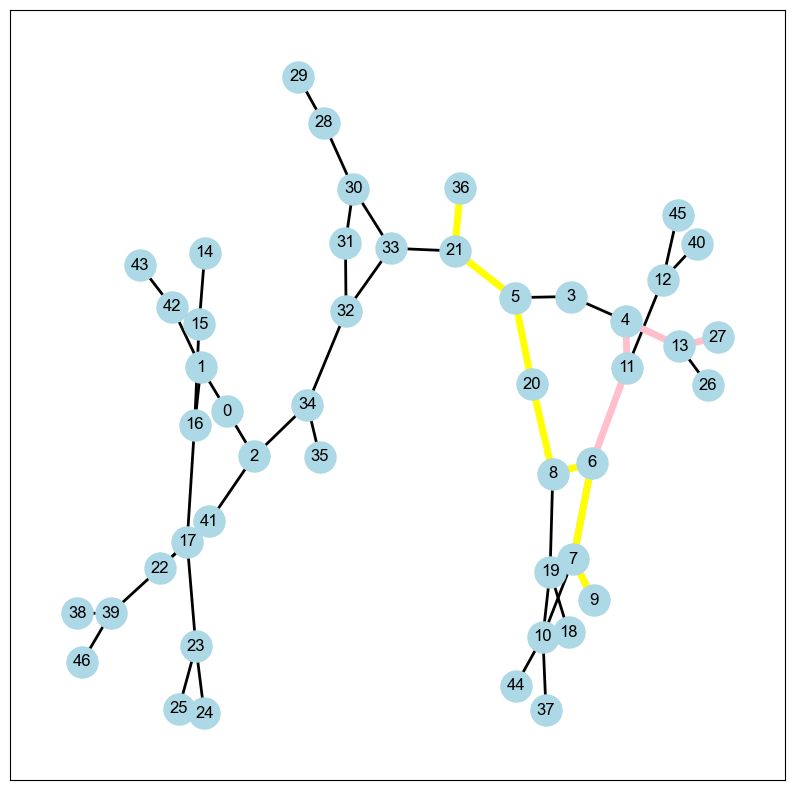

In [32]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7,
                  8, 9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 23, 24,
                  25, 26, 27, 28, 29, 30, 31, 32,
                  33, 34, 35, 36, 37, 38, 39, 40,
                  41, 42, 43, 44, 45, 46])
G.add_edges_from([(0, 1), (0, 2), (1, 42), (1, 16), 
                  (2, 41), (3, 4), (3, 5), (4, 11), 
                  (4, 13), (5, 21), (5, 20), (6, 7), 
                  (6, 8), (7, 9), (7, 10), (8, 20), 
                  (10, 44), (10, 19), (11, 6), (12, 11), 
                  (13, 26), (13, 27), (14, 15), (15, 16), 
                  (16, 17), (17, 22), (17, 23), (18, 19), 
                  (19, 8), (21, 36), (21, 33), (22, 41), 
                  (23, 24), (23, 25), (28, 29), (30, 28), 
                  (31, 30), (31, 32), (32, 34), (33, 32), 
                  (33, 30), (34, 35), (34, 2), (37, 10), 
                  (38, 39), (39, 22), (40, 12), (42, 15), 
                  (42, 43), (45, 12), (46, 39)])

find_path_9_to_27 = [(9, 7), (7, 6), (6, 11), (11, 4), (4, 13), (13, 27)]
find_path_9_to_36 = [(9, 7), (7, 6), (6, 8), (8, 20), (20, 5), (5, 21), (21, 36)]

pos = nx.spring_layout(G)
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'lightblue')
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black', font_family = 'Arial')
nx.draw_networkx_edges(G, pos, edge_color = 'black', width = 2)
nx.draw_networkx_edges(G,pos,edgelist=find_path_9_to_27, edge_color='pink', width=5)
nx.draw_networkx_edges(G,pos,edgelist=find_path_9_to_36, edge_color='yellow', width=5)

### The distance from Dongyuan elementary school to MacKay Memorial Hospital (27) is 4.629299999999999, and the distance to Cathay General Hospital (36) is 2.3446.

### ● Find the shortest path from Sanmin elementary School to MacKay Memorial Hospital and Cathay General Hospital

In [33]:
# Driver's code
if __name__ == "__main__":
    g = Graph(47)
    g.graph = dist_matrix
    g.dijkstra(7)

Vertex 	Distance from Source
47
0 	 3.0439999999999996
1 	 3.6136999999999997
2 	 2.4589999999999996
3 	 3.8526999999999996
4 	 3.8127999999999993
5 	 3.6175999999999995
6 	 0.227
7 	 0
8 	 0.9833
9 	 0.3607
10 	 0.1417
11 	 1.7064
12 	 1.1199
13 	 0.4905
14 	 0.6728
15 	 0.8773
16 	 0.7807
17 	 0.7355999999999999
18 	 0.7417999999999999
19 	 0.7962999999999999
20 	 0.4416
21 	 0.22749999999999998
22 	 0.32489999999999997
23 	 3.9060999999999995
24 	 3.8627999999999996
25 	 4.1754999999999995
26 	 3.8040999999999996
27 	 4.269799999999999
28 	 0.8467999999999999
29 	 1.7594999999999998
30 	 1.9103999999999999
31 	 4.457599999999999
32 	 4.3534999999999995
33 	 1.9969999999999999
34 	 2.0662
35 	 1.9151999999999998
36 	 1.9850999999999999
37 	 1.9804
38 	 2.073
39 	 2.1464
40 	 0.7404
41 	 4.101699999999999
42 	 3.9398999999999993
43 	 0.5731999999999999
44 	 3.9520999999999997
45 	 0.56
46 	 4.065499999999999


In [34]:
find_path_7_to_27 = [(7, 6), (6, 11), (11, 4), (4, 13), (13, 27)]

In [35]:
find_path_7_to_36 = [(7, 6), (6, 8), (8, 20), (20, 5), (5, 21), (21, 36)]

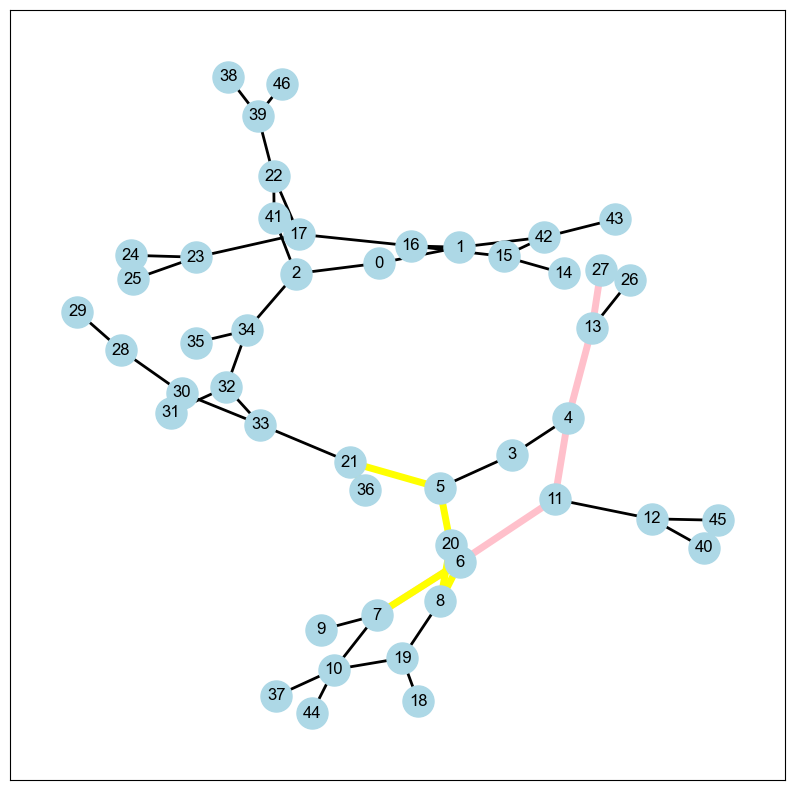

In [36]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7,
                  8, 9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 23, 24,
                  25, 26, 27, 28, 29, 30, 31, 32,
                  33, 34, 35, 36, 37, 38, 39, 40,
                  41, 42, 43, 44, 45, 46])
G.add_edges_from([(0, 1), (0, 2), (1, 42), (1, 16), 
                  (2, 41), (3, 4), (3, 5), (4, 11), 
                  (4, 13), (5, 21), (5, 20), (6, 7), 
                  (6, 8), (7, 9), (7, 10), (8, 20), 
                  (10, 44), (10, 19), (11, 6), (12, 11), 
                  (13, 26), (13, 27), (14, 15), (15, 16), 
                  (16, 17), (17, 22), (17, 23), (18, 19), 
                  (19, 8), (21, 36), (21, 33), (22, 41), 
                  (23, 24), (23, 25), (28, 29), (30, 28), 
                  (31, 30), (31, 32), (32, 34), (33, 32), 
                  (33, 30), (34, 35), (34, 2), (37, 10), 
                  (38, 39), (39, 22), (40, 12), (42, 15), 
                  (42, 43), (45, 12), (46, 39)])

pos = nx.spring_layout(G)
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'lightblue')
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black', font_family = 'Arial')
nx.draw_networkx_edges(G, pos, edge_color = 'black', width = 2)
nx.draw_networkx_edges(G,pos,edgelist=find_path_7_to_27, edge_color='pink', width=5)
nx.draw_networkx_edges(G,pos,edgelist=find_path_7_to_36, edge_color='yellow', width=5)

### The distance from Sanmin elementary school to MacKay Memorial Hospital (27) is 4.269799999999999, and the distance to Cathay General Hospital (36) is 1.9850999999999999.

### ● Find the shortest path from Guandong elementary School to MacKay Memorial Hospital and Cathay General Hospital

In [37]:
 # Driver's code
if __name__ == "__main__":
    g = Graph(47)
    g.graph = dist_matrix
    g.dijkstra(24)
    

Vertex 	Distance from Source
47
0 	 0.8188
1 	 0.2491
2 	 1.4038
3 	 0.0101
4 	 0.0919
5 	 1.0764999999999998
6 	 3.6357999999999997
7 	 3.8627999999999996
8 	 2.8794999999999997
9 	 4.222299999999999
10 	 4.004499999999999
11 	 2.1563999999999997
12 	 3.4631
13 	 4.092499999999999
14 	 3.9242999999999992
15 	 3.7056999999999993
16 	 4.0322
17 	 3.8614999999999995
18 	 3.8676999999999992
19 	 3.8007999999999993
20 	 4.303199999999999
21 	 4.090299999999999
22 	 4.1876999999999995
23 	 0.0433
24 	 0
25 	 0.5186
26 	 0.8899999999999999
27 	 0.6129
28 	 3.8512999999999993
29 	 2.2095
30 	 1.9524
31 	 0.8007
32 	 0.6965999999999999
33 	 2.0389999999999997
34 	 2.1081999999999996
35 	 1.9571999999999998
36 	 1.8874
37 	 1.8824
38 	 1.7898
39 	 1.8632
40 	 3.8662999999999994
41 	 1.1875999999999998
42 	 1.0257999999999998
43 	 4.434799999999998
44 	 0.1095
45 	 4.421599999999999
46 	 1.1513999999999998


In [38]:
find_path_24_to_27 = [(24, 23),(23, 17),(17, 22),(22, 41),(41, 2),(2, 34),(34, 32),(32, 33),(33, 21),(21, 5),(5, 3),(3, 4),(4, 13),(13, 27)]

In [39]:
find_path_7_to_36 = [(24, 23),(23, 17),(17, 22),(22, 41),(41, 2),(2, 34),(34, 32),(32, 33),(33, 21),(21, 36)]

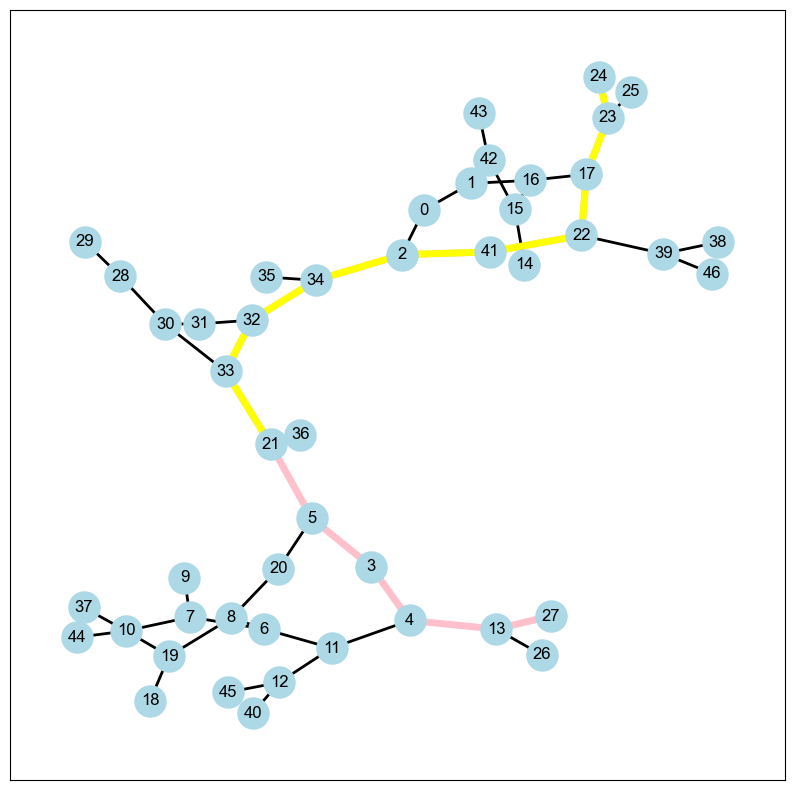

In [40]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7,
                  8, 9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 23, 24,
                  25, 26, 27, 28, 29, 30, 31, 32,
                  33, 34, 35, 36, 37, 38, 39, 40,
                  41, 42, 43, 44, 45, 46])
G.add_edges_from([(0, 1), (0, 2), (1, 42), (1, 16), 
                  (2, 41), (3, 4), (3, 5), (4, 11), 
                  (4, 13), (5, 21), (5, 20), (6, 7), 
                  (6, 8), (7, 9), (7, 10), (8, 20), 
                  (10, 44), (10, 19), (11, 6), (12, 11), 
                  (13, 26), (13, 27), (14, 15), (15, 16), 
                  (16, 17), (17, 22), (17, 23), (18, 19), 
                  (19, 8), (21, 36), (21, 33), (22, 41), 
                  (23, 24), (23, 25), (28, 29), (30, 28), 
                  (31, 30), (31, 32), (32, 34), (33, 32), 
                  (33, 30), (34, 35), (34, 2), (37, 10), 
                  (38, 39), (39, 22), (40, 12), (42, 15), 
                  (42, 43), (45, 12), (46, 39)])

pos = nx.spring_layout(G)
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'lightblue')
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black', font_family = 'Arial')
nx.draw_networkx_edges(G, pos, edge_color = 'black', width = 2)
nx.draw_networkx_edges(G,pos,edgelist=find_path_24_to_27, edge_color='pink', width=5)
nx.draw_networkx_edges(G,pos,edgelist=find_path_7_to_36, edge_color='yellow', width=5)

### The distance from Guandong elementary school to MacKay Memorial Hospital (27) is 0.6129, and the distance to Cathay General Hospital (36) is 1.8874.

## (3) Run the Floyd-Warshall Algorithm

### In this part, we have to create a strucutre of Floyd-Warshall Alogorithm.

### ● The shortest path from the three elementary schools to Mackay Memorial Hospital

In [45]:
def initialise(V):
    global dis, Next
 
    for i in range(V):
        for j in range(V):
            dis[i][j] = graph[i][j]
 
            # No edge between node
            # i and j
            if (graph[i][j] == INF):
                Next[i][j] = -1
            else:
                Next[i][j] = j
 
# Function construct the shortest
# path between u and v
def constructPath(u, v):
    global graph, Next
     
    # If there's no path between
    # node u and v, simply return
    # an empty array
    if (Next[u][v] == -1):
        return {}
 
    # Storing the path in a vector
    path = [u]
    while (u != v):
        u = Next[u][v]
        path.append(u)
 
    return path
 
# Standard Floyd Warshall Algorithm
# with little modification Now if we find
# that dis[i],[j], > dis[i],[k], + dis[k],[j],
# then we modify next[i],[j], = next[i],[k],
def floydWarshall(V):
    global dist, Next
    for k in range(V):
        for i in range(V):
            for j in range(V):
                 
                # We cannot travel through
                # edge that doesn't exist
                if (dis[i][k] == INF or dis[k][j] == INF):
                    continue
                if (dis[i][j] > dis[i][k] + dis[k][j]):
                    dis[i][j] = dis[i][k] + dis[k][j]
                    Next[i][j] = Next[i][k]
 
# Print the shortest path
def printPath(path):
    n = len(path)
    for i in range(n - 1):
        print(path[i], end=" -> ")
    print (path[n - 1])
 
# Driver code
if __name__ == '__main__':
    MAXM,INF = 100,10**7
    dis = [[-1 for i in range(MAXM)] for i in range(MAXM)]
    Next = [[-1 for i in range(MAXM)] for i in range(MAXM)]
 
    V = 47
    graph = dist_matrix
    # Function to initialise the
    # distance and Next array
    initialise(V)
 
    # Calling Floyd Warshall Algorithm,
    # this will update the shortest
    # distance as well as Next array
    floydWarshall(V)
    path = []
 
    print("Shortest path from 9 (Dongyuan Elementary School) to 27: ", end = "")
    path = constructPath(9, 27)
    printPath(path)

    print("Shortest path from 7 (Sanmin Elementary School) to 27: ", end = "")
    path = constructPath(7, 27)
    printPath(path)
 
    print("Shortest path from 24 (Guandong Elementary School) to 27: ", end = "")
    path = constructPath(24, 27)
    printPath(path)
 

Shortest path from 9 (Dongyuan Elementary School) to 27: 9 -> 15 -> 2 -> 27
Shortest path from 7 (Sanmin Elementary School) to 27: 7 -> 2 -> 27
Shortest path from 24 (Guandong Elementary School) to 27: 24 -> 27


In [42]:
position = number.index(15)
nodes[position]

'314947113'

In [70]:
position = number.index(2)
nodes[position]

'1978206256'

### ● The shortest path from the three elementary schools to Cathay General Hospital

In [46]:
# Driver code
if __name__ == '__main__':
    MAXM,INF = 100,10**7
    dis = [[-1 for i in range(MAXM)] for i in range(MAXM)]
    Next = [[-1 for i in range(MAXM)] for i in range(MAXM)]
 
    V = 47
    graph = dist_matrix
    # Function to initialise the
    # distance and Next array
    initialise(V)
 
    # Calling Floyd Warshall Algorithm,
    # this will update the shortest
    # distance as well as Next array
    floydWarshall(V)
    path = []
 
    print("Shortest path from 9 (Dongyuan Elementary School) to 36: ", end = "")
    path = constructPath(9, 36)
    printPath(path)

    print("Shortest path from 7 (Sanmin Elementary School) to 36: ", end = "")
    path = constructPath(7, 36)
    printPath(path)
 
    print("Shortest path from 24 (Guandong Elementary School) to 36: ", end = "")
    path = constructPath(24, 36)
    printPath(path)

Shortest path from 9 (Dongyuan Elementary School) to 36: 9 -> 36
Shortest path from 7 (Sanmin Elementary School) to 36: 7 -> 11 -> 36
Shortest path from 24 (Guandong Elementary School) to 36: 24 -> 36


In [47]:
position = number.index(11)
nodes[position]

'313164190'

## (3) Run the Network Simplex Algorithm

### ● The shortest path from the three elementary schools to Mackay Memorial Hospital

In [74]:
G.add_weighted_edges_from(([(0, 1, 0.5697), (0, 2, 0.585), (1, 42, 0.239), (1, 16, 0.1991), 
  (2, 41, 1.1586), (3, 4, 0.227), (3, 5, 0.7563), (4, 11, 0.3607), 
  (4, 13, 0.1417), (5, 21, 0.7231), (5, 20, 0.5836), (6, 7, 0.1823), 
  (6, 8, 0.3868), (7, 9, 0.1079), (7, 10, 0.0628), (8, 20, 0.2426), 
  (10, 44, 0.0062), (10, 19, 0.0607), (11, 6, 0.1298), (12, 11, 0.0809), 
  (13, 26, 0.0858), (13, 27, 0.1832), (14, 15, 0.0433), (15, 16, 0.0919), 
  (16, 17, 0.4267), (17, 22, 0.3714), (17, 23, 0.0943), (18, 19, 0.0505), 
  (19, 8, 0.0951), (21, 36, 0.0531), (21, 33, 0.204), (22, 41, 0.1865), 
  (23, 24, 0.1878), (23, 25, 0.0837), (28, 29, 0.0692), (30, 28, 0.0818), 
  (31, 30, 0.0699), (31, 32, 0.005), (32, 34, 0.0926), (33, 32, 0.07), 
  (33, 30, 0.0048), (34, 35, 0.0734), (34, 2, 0.386), (37, 10, 0.0048), 
  (38, 39, 0.1618), (39, 22, 0.1358), (40, 12, 0.1316), (42, 15, 0.0101), 
  (42, 43, 0.0994), (45, 12, 0.1184), (46, 39, 0.1256)]))

# Use NetworkX's built-in function to find the shortest path
path = nx.shortest_path(G, source=number.index(9), target=number.index(27), weight='dist')
# Print the minimum cost path
print(path)

# Use NetworkX's built-in function to find the shortest path
path = nx.shortest_path(G, source=number.index(7), target=number.index(27), weight='dist')
# Print the minimum cost path
print(path)

# Use NetworkX's built-in function to find the shortest path
path = nx.shortest_path(G, source=number.index(24), target=number.index(27), weight='dist')
# Print the minimum cost path
print(path)

[9, 7, 6, 11, 4, 13, 27]
[7, 6, 11, 4, 13, 27]
[24, 23, 17, 22, 41, 2, 34, 32, 33, 21, 5, 3, 4, 13, 27]


### ● The shortest path from the three elementary school to Cathay General Hospital

In [75]:
# Use NetworkX's built-in function to find the shortest path
path = nx.shortest_path(G, source=number.index(9), target=number.index(36), weight='dist')
# Print the minimum cost path
print(path)

# Use NetworkX's built-in function to find the shortest path
path = nx.shortest_path(G, source=number.index(7), target=number.index(36), weight='dist')
# Print the minimum cost path
print(path)

# Use NetworkX's built-in function to find the shortest path
path = nx.shortest_path(G, source=number.index(24), target=number.index(36), weight='dist')
# Print the minimum cost path
print(path)

[9, 7, 6, 8, 20, 5, 21, 36]
[7, 6, 8, 20, 5, 21, 36]
[24, 23, 17, 22, 41, 2, 34, 32, 33, 21, 36]


## Conclusion:
### The Networks Simplex Algorithm shares the same result as Dijkstra's Algorithm. 
### We can get the conclusion that if the schools are located in downtown and suburbs area, it is better to choose Cathay Hospital. However, if the schools are located near the rural area, MacKay Hospital will be the choice.
### We are suprised that the final results are different from our assumptions. The result that is different from our guessing is the Dongyuan elementary school. At first, I was really confident that Dongyuan elementary will be the nearer to the MacKay Hospital, but in fact, it is much nearer to Cathay Hospital.
### Some possible reasons may be, first, the highway system. Because we chose highway system as the dataframe. However, the highway system in some areas may by uncomplementary, so it will be harder to reach the destinations if we choose to transport through highway. Second, the highway system in some areas may be too complicated, and hence causing redundant traveling time and costs.
### By doing this report, I reassure the importance of shortest path algorithm. Although we have a lot of experiences and knowledge about our hometown, we might still do the wrong judgement.